In [47]:
import cv2
import numpy as np
from IPython.display import clear_output, display, HTML
from base64 import b64encode
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def display_video(video_path):
    video_data = open(video_path, "rb").read()
    video_encoded = b64encode(video_data).decode("ascii")
    video_tag = f'<video width="256" height="256" controls alt="test" src="data:video/mp4;base64,{video_encoded}">'
    display(HTML(video_tag))
    
def resize_and_pad(frame, target_size=256):
    # Calculate the aspect ratio of the frame
    height, width = frame.shape[:2]
    aspect_ratio = float(width) / float(height)

    # Calculate new dimensions based on the aspect ratio
    if height > width:
        new_height = target_size
        new_width = int(target_size * aspect_ratio)
    else:
        new_width = target_size
        new_height = int(target_size / aspect_ratio)

    # Resize the frame
    resized_frame = cv2.resize(frame, (new_width, new_height))

    # Calculate padding
    pad_height = target_size - new_height
    pad_width = target_size - new_width

    # Pad the resized frame with black pixels
    padded_frame = cv2.copyMakeBorder(resized_frame,
                                      top=pad_height//2,
                                      bottom=pad_height-(pad_height//2),
                                      left=pad_width//2,
                                      right=pad_width-(pad_width//2),
                                      borderType=cv2.BORDER_CONSTANT,
                                      value=[0, 0, 0])

    return padded_frame
    
def preprocess_frame(frame):
    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Resize or apply other preprocessing steps if necessary
    return gray_frame

def get_video_frames(video_path):
    frames = []
    video_capture = cv2.VideoCapture(video_path)

    while video_capture.isOpened():
        ret, frame = video_capture.read()
        if ret:
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            resized_frame = resize_and_pad(gray_frame, 256)
            frames.append(resized_frame)
        else:
            break

    video_capture.release()
    return frames



In [55]:
video_path = "Real-life_Deception_Detection_2016/Clips/Deceptive/trial_lie_001.mp4"
display_video(video_path)

In [56]:
video_frames = get_video_frames(video_path)

In [57]:
video_frames = np.array(video_frames)

In [58]:
video_frames.shape

(510, 256, 256)

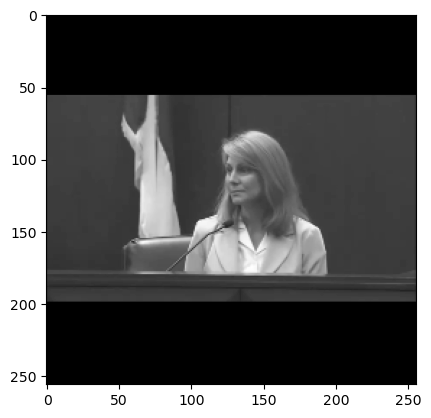

In [59]:
plt.imshow(video_frames[500], cmap = 'gray')